## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3        X4         Y
0  41.344573  125.814330  0.077488  7.924572  0.379024
1  13.512587  383.505070  0.150005  9.649580  1.273339
2  83.477816  572.630142  0.028917  6.782238  0.255305
3  32.375795  460.565731  0.332667  4.199980  1.444622
4   1.036416  343.839321  0.632933  6.826102  1.583864


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.07983 | train_mse: 5.83948 | train_mae: 1.72869 |  0:00:00s
epoch 1  | loss: 0.68175 | train_mse: 5.52906 | train_mae: 1.67932 |  0:00:00s
epoch 2  | loss: 0.87142 | train_mse: 2.31345 | train_mae: 1.07144 |  0:00:00s


epoch 3  | loss: 0.47102 | train_mse: 1.49265 | train_mae: 0.84615 |  0:00:00s
epoch 4  | loss: 0.5105  | train_mse: 0.97633 | train_mae: 0.67545 |  0:00:00s
epoch 5  | loss: 0.31679 | train_mse: 0.70885 | train_mae: 0.60483 |  0:00:00s


epoch 6  | loss: 0.41311 | train_mse: 0.55546 | train_mae: 0.52619 |  0:00:00s
epoch 7  | loss: 0.41813 | train_mse: 0.692   | train_mae: 0.58168 |  0:00:00s
epoch 8  | loss: 0.38361 | train_mse: 0.71355 | train_mae: 0.54422 |  0:00:00s


epoch 9  | loss: 0.37451 | train_mse: 0.52992 | train_mae: 0.50266 |  0:00:00s
epoch 10 | loss: 0.34493 | train_mse: 0.45159 | train_mae: 0.48829 |  0:00:01s
epoch 11 | loss: 0.37403 | train_mse: 0.49851 | train_mae: 0.50077 |  0:00:01s


epoch 12 | loss: 0.41904 | train_mse: 0.42997 | train_mae: 0.46561 |  0:00:01s
epoch 13 | loss: 0.27954 | train_mse: 0.3255  | train_mae: 0.39301 |  0:00:01s


epoch 14 | loss: 0.26937 | train_mse: 0.27246 | train_mae: 0.34569 |  0:00:01s
epoch 15 | loss: 0.35576 | train_mse: 0.37961 | train_mae: 0.41112 |  0:00:01s
epoch 16 | loss: 0.2033  | train_mse: 0.36627 | train_mae: 0.3725  |  0:00:01s


epoch 17 | loss: 0.1861  | train_mse: 0.35599 | train_mae: 0.36739 |  0:00:01s
epoch 18 | loss: 0.24487 | train_mse: 0.32742 | train_mae: 0.3739  |  0:00:01s
epoch 19 | loss: 0.1707  | train_mse: 0.35849 | train_mae: 0.37559 |  0:00:02s


epoch 20 | loss: 0.40472 | train_mse: 0.34166 | train_mae: 0.35228 |  0:00:02s
epoch 21 | loss: 0.18331 | train_mse: 0.20511 | train_mae: 0.30667 |  0:00:02s
epoch 22 | loss: 0.24273 | train_mse: 0.2421  | train_mae: 0.32201 |  0:00:02s


epoch 23 | loss: 0.14069 | train_mse: 0.2043  | train_mae: 0.32492 |  0:00:02s
epoch 24 | loss: 0.29109 | train_mse: 0.22383 | train_mae: 0.33486 |  0:00:02s
epoch 25 | loss: 0.15213 | train_mse: 0.14405 | train_mae: 0.30467 |  0:00:02s


epoch 26 | loss: 0.16668 | train_mse: 0.13204 | train_mae: 0.28473 |  0:00:02s


epoch 27 | loss: 0.18396 | train_mse: 0.26603 | train_mae: 0.35675 |  0:00:03s
epoch 28 | loss: 0.16244 | train_mse: 0.26809 | train_mae: 0.34033 |  0:00:03s


epoch 29 | loss: 0.20688 | train_mse: 0.2119  | train_mae: 0.33726 |  0:00:03s
epoch 30 | loss: 0.2367  | train_mse: 0.16551 | train_mae: 0.29888 |  0:00:03s
epoch 31 | loss: 0.17619 | train_mse: 0.20069 | train_mae: 0.31045 |  0:00:03s
epoch 32 | loss: 0.15021 | train_mse: 0.20189 | train_mae: 0.30918 |  0:00:03s


epoch 33 | loss: 0.15841 | train_mse: 0.14323 | train_mae: 0.27629 |  0:00:03s
epoch 34 | loss: 0.16201 | train_mse: 0.12406 | train_mae: 0.25737 |  0:00:03s
epoch 35 | loss: 0.10529 | train_mse: 0.10696 | train_mae: 0.24947 |  0:00:03s


epoch 36 | loss: 0.25833 | train_mse: 0.12118 | train_mae: 0.26217 |  0:00:03s
epoch 37 | loss: 0.13239 | train_mse: 0.12154 | train_mae: 0.25914 |  0:00:03s
epoch 38 | loss: 0.1082  | train_mse: 0.12319 | train_mae: 0.26489 |  0:00:03s


epoch 39 | loss: 0.16044 | train_mse: 0.14184 | train_mae: 0.29588 |  0:00:04s
epoch 40 | loss: 0.32811 | train_mse: 0.22086 | train_mae: 0.35782 |  0:00:04s
epoch 41 | loss: 0.25809 | train_mse: 0.25389 | train_mae: 0.3504  |  0:00:04s
epoch 42 | loss: 0.18226 | train_mse: 0.19612 | train_mae: 0.31289 |  0:00:04s


epoch 43 | loss: 0.20095 | train_mse: 0.16536 | train_mae: 0.30225 |  0:00:04s
epoch 44 | loss: 0.15933 | train_mse: 0.18481 | train_mae: 0.31867 |  0:00:04s
epoch 45 | loss: 0.20082 | train_mse: 0.20652 | train_mae: 0.3332  |  0:00:04s
epoch 46 | loss: 0.13376 | train_mse: 0.18659 | train_mae: 0.30699 |  0:00:04s


epoch 47 | loss: 0.12812 | train_mse: 0.1577  | train_mae: 0.26876 |  0:00:04s
epoch 48 | loss: 0.2439  | train_mse: 0.15502 | train_mae: 0.265   |  0:00:04s
epoch 49 | loss: 0.22995 | train_mse: 0.15432 | train_mae: 0.26149 |  0:00:04s
epoch 50 | loss: 0.20916 | train_mse: 0.13765 | train_mae: 0.2555  |  0:00:04s


epoch 51 | loss: 0.13643 | train_mse: 0.10266 | train_mae: 0.23801 |  0:00:04s
epoch 52 | loss: 0.18243 | train_mse: 0.10027 | train_mae: 0.24349 |  0:00:04s
epoch 53 | loss: 0.11348 | train_mse: 0.08454 | train_mae: 0.23137 |  0:00:04s


epoch 54 | loss: 0.15582 | train_mse: 0.07625 | train_mae: 0.21799 |  0:00:05s
epoch 55 | loss: 0.14546 | train_mse: 0.08636 | train_mae: 0.22532 |  0:00:05s
epoch 56 | loss: 0.13613 | train_mse: 0.07129 | train_mae: 0.20562 |  0:00:05s


epoch 57 | loss: 0.32045 | train_mse: 0.07637 | train_mae: 0.20872 |  0:00:05s
epoch 58 | loss: 0.13411 | train_mse: 0.09188 | train_mae: 0.22765 |  0:00:05s
epoch 59 | loss: 0.0834  | train_mse: 0.12524 | train_mae: 0.2537  |  0:00:05s


epoch 60 | loss: 0.20197 | train_mse: 0.14979 | train_mae: 0.28167 |  0:00:05s
epoch 61 | loss: 0.15218 | train_mse: 0.12324 | train_mae: 0.25608 |  0:00:05s
epoch 62 | loss: 0.24238 | train_mse: 0.10575 | train_mae: 0.25257 |  0:00:05s
epoch 63 | loss: 0.13452 | train_mse: 0.08393 | train_mae: 0.23443 |  0:00:05s


epoch 64 | loss: 0.10238 | train_mse: 0.07718 | train_mae: 0.22208 |  0:00:05s
epoch 65 | loss: 0.1122  | train_mse: 0.0765  | train_mae: 0.21451 |  0:00:05s


epoch 66 | loss: 0.15985 | train_mse: 0.07644 | train_mae: 0.21213 |  0:00:05s
epoch 67 | loss: 0.10343 | train_mse: 0.07089 | train_mae: 0.19439 |  0:00:06s
epoch 68 | loss: 0.19938 | train_mse: 0.08009 | train_mae: 0.19566 |  0:00:06s


epoch 69 | loss: 0.14165 | train_mse: 0.07147 | train_mae: 0.20341 |  0:00:06s
epoch 70 | loss: 0.11761 | train_mse: 0.06694 | train_mae: 0.20159 |  0:00:06s
epoch 71 | loss: 0.08628 | train_mse: 0.07465 | train_mae: 0.21952 |  0:00:06s
epoch 72 | loss: 0.13689 | train_mse: 0.07369 | train_mae: 0.22248 |  0:00:06s


epoch 73 | loss: 0.10512 | train_mse: 0.05847 | train_mae: 0.19218 |  0:00:06s
epoch 74 | loss: 0.09973 | train_mse: 0.05233 | train_mae: 0.17298 |  0:00:06s
epoch 75 | loss: 0.1039  | train_mse: 0.05818 | train_mae: 0.18011 |  0:00:06s


epoch 76 | loss: 0.23524 | train_mse: 0.04622 | train_mae: 0.16625 |  0:00:06s
epoch 77 | loss: 0.08811 | train_mse: 0.0403  | train_mae: 0.15801 |  0:00:06s
epoch 78 | loss: 0.16024 | train_mse: 0.04588 | train_mae: 0.17625 |  0:00:06s


epoch 79 | loss: 0.1577  | train_mse: 0.04316 | train_mae: 0.16846 |  0:00:06s
epoch 80 | loss: 0.06508 | train_mse: 0.04731 | train_mae: 0.17277 |  0:00:07s


epoch 81 | loss: 0.09541 | train_mse: 0.06204 | train_mae: 0.18562 |  0:00:07s
epoch 82 | loss: 0.10732 | train_mse: 0.05832 | train_mae: 0.18466 |  0:00:07s


epoch 83 | loss: 0.08033 | train_mse: 0.06605 | train_mae: 0.20321 |  0:00:07s
epoch 84 | loss: 0.16653 | train_mse: 0.06387 | train_mae: 0.20338 |  0:00:07s
epoch 85 | loss: 0.06819 | train_mse: 0.06336 | train_mae: 0.19953 |  0:00:07s


epoch 86 | loss: 0.09976 | train_mse: 0.05316 | train_mae: 0.17578 |  0:00:07s
epoch 87 | loss: 0.08432 | train_mse: 0.0568  | train_mae: 0.18706 |  0:00:07s


epoch 88 | loss: 0.0779  | train_mse: 0.08341 | train_mae: 0.22392 |  0:00:08s
epoch 89 | loss: 0.08831 | train_mse: 0.07973 | train_mae: 0.20159 |  0:00:08s
epoch 90 | loss: 0.08293 | train_mse: 0.06403 | train_mae: 0.19243 |  0:00:08s


epoch 91 | loss: 0.07786 | train_mse: 0.06043 | train_mae: 0.19385 |  0:00:08s
epoch 92 | loss: 0.12494 | train_mse: 0.06817 | train_mae: 0.20618 |  0:00:08s
epoch 93 | loss: 0.1147  | train_mse: 0.09718 | train_mae: 0.2361  |  0:00:08s


epoch 94 | loss: 0.10319 | train_mse: 0.09313 | train_mae: 0.22425 |  0:00:08s
epoch 95 | loss: 0.04553 | train_mse: 0.05765 | train_mae: 0.18822 |  0:00:08s
epoch 96 | loss: 0.08811 | train_mse: 0.05328 | train_mae: 0.18629 |  0:00:08s


epoch 97 | loss: 0.07178 | train_mse: 0.05423 | train_mae: 0.18947 |  0:00:08s
epoch 98 | loss: 0.13234 | train_mse: 0.05739 | train_mae: 0.19292 |  0:00:08s
epoch 99 | loss: 0.15327 | train_mse: 0.08364 | train_mae: 0.21859 |  0:00:08s


epoch 100| loss: 0.09639 | train_mse: 0.07485 | train_mae: 0.20684 |  0:00:09s
epoch 101| loss: 0.1395  | train_mse: 0.06398 | train_mae: 0.19718 |  0:00:09s


epoch 102| loss: 0.10667 | train_mse: 0.04955 | train_mae: 0.1847  |  0:00:09s
epoch 103| loss: 0.05382 | train_mse: 0.05193 | train_mae: 0.17591 |  0:00:09s
epoch 104| loss: 0.09596 | train_mse: 0.06571 | train_mae: 0.18784 |  0:00:09s


epoch 105| loss: 0.1101  | train_mse: 0.0473  | train_mae: 0.16474 |  0:00:09s
epoch 106| loss: 0.13748 | train_mse: 0.04433 | train_mae: 0.16186 |  0:00:09s
epoch 107| loss: 0.07846 | train_mse: 0.05476 | train_mae: 0.18486 |  0:00:09s


epoch 108| loss: 0.07641 | train_mse: 0.04769 | train_mae: 0.17027 |  0:00:09s


epoch 109| loss: 0.1338  | train_mse: 0.04841 | train_mae: 0.16808 |  0:00:10s
epoch 110| loss: 0.22839 | train_mse: 0.04969 | train_mae: 0.17513 |  0:00:10s
epoch 111| loss: 0.09656 | train_mse: 0.04867 | train_mae: 0.17136 |  0:00:10s


epoch 112| loss: 0.06288 | train_mse: 0.046   | train_mae: 0.16446 |  0:00:10s


epoch 113| loss: 0.13033 | train_mse: 0.04627 | train_mae: 0.16744 |  0:00:10s
epoch 114| loss: 0.08256 | train_mse: 0.04042 | train_mae: 0.15149 |  0:00:10s
epoch 115| loss: 0.09642 | train_mse: 0.0468  | train_mae: 0.175   |  0:00:10s


epoch 116| loss: 0.13189 | train_mse: 0.05934 | train_mae: 0.19569 |  0:00:10s
epoch 117| loss: 0.08027 | train_mse: 0.03786 | train_mae: 0.14984 |  0:00:10s
epoch 118| loss: 0.08728 | train_mse: 0.04498 | train_mae: 0.1641  |  0:00:10s


epoch 119| loss: 0.11338 | train_mse: 0.0382  | train_mae: 0.14706 |  0:00:10s
epoch 120| loss: 0.08411 | train_mse: 0.03807 | train_mae: 0.15623 |  0:00:11s
epoch 121| loss: 0.11251 | train_mse: 0.05701 | train_mae: 0.18019 |  0:00:11s


epoch 122| loss: 0.17157 | train_mse: 0.07361 | train_mae: 0.19048 |  0:00:11s
epoch 123| loss: 0.07711 | train_mse: 0.07616 | train_mae: 0.20557 |  0:00:11s
epoch 124| loss: 0.11146 | train_mse: 0.04799 | train_mae: 0.16998 |  0:00:11s


epoch 125| loss: 0.08093 | train_mse: 0.04569 | train_mae: 0.16819 |  0:00:11s
epoch 126| loss: 0.12139 | train_mse: 0.05421 | train_mae: 0.17947 |  0:00:11s
epoch 127| loss: 0.10868 | train_mse: 0.06939 | train_mae: 0.19623 |  0:00:11s


epoch 128| loss: 0.12484 | train_mse: 0.07212 | train_mae: 0.1959  |  0:00:11s
epoch 129| loss: 0.20041 | train_mse: 0.06214 | train_mae: 0.1866  |  0:00:11s
epoch 130| loss: 0.11555 | train_mse: 0.06967 | train_mae: 0.19353 |  0:00:11s


epoch 131| loss: 0.06337 | train_mse: 0.06806 | train_mae: 0.1973  |  0:00:12s
epoch 132| loss: 0.08826 | train_mse: 0.06235 | train_mae: 0.19226 |  0:00:12s
epoch 133| loss: 0.1037  | train_mse: 0.05043 | train_mae: 0.17417 |  0:00:12s


epoch 134| loss: 0.05923 | train_mse: 0.04777 | train_mae: 0.17059 |  0:00:12s
epoch 135| loss: 0.05183 | train_mse: 0.04237 | train_mae: 0.15475 |  0:00:12s
epoch 136| loss: 0.06462 | train_mse: 0.04851 | train_mae: 0.16372 |  0:00:12s


epoch 137| loss: 0.08165 | train_mse: 0.04832 | train_mae: 0.16217 |  0:00:12s
epoch 138| loss: 0.06586 | train_mse: 0.05519 | train_mae: 0.17516 |  0:00:12s
epoch 139| loss: 0.08465 | train_mse: 0.07583 | train_mae: 0.19951 |  0:00:12s


epoch 140| loss: 0.08395 | train_mse: 0.0705  | train_mae: 0.20254 |  0:00:12s
epoch 141| loss: 0.1007  | train_mse: 0.06049 | train_mae: 0.18851 |  0:00:12s
epoch 142| loss: 0.06473 | train_mse: 0.05072 | train_mae: 0.17089 |  0:00:13s


epoch 143| loss: 0.11478 | train_mse: 0.04774 | train_mae: 0.16212 |  0:00:13s
epoch 144| loss: 0.10209 | train_mse: 0.05779 | train_mae: 0.17825 |  0:00:13s


epoch 145| loss: 0.06486 | train_mse: 0.055   | train_mae: 0.17929 |  0:00:13s
epoch 146| loss: 0.09197 | train_mse: 0.05274 | train_mae: 0.17716 |  0:00:13s
epoch 147| loss: 0.13159 | train_mse: 0.05639 | train_mae: 0.18043 |  0:00:13s


epoch 148| loss: 0.07241 | train_mse: 0.06149 | train_mae: 0.18313 |  0:00:13s
epoch 149| loss: 0.076   | train_mse: 0.06764 | train_mae: 0.18823 |  0:00:13s
epoch 150| loss: 0.09564 | train_mse: 0.05779 | train_mae: 0.1737  |  0:00:13s


epoch 151| loss: 0.06336 | train_mse: 0.04676 | train_mae: 0.15487 |  0:00:13s
epoch 152| loss: 0.07309 | train_mse: 0.05565 | train_mae: 0.17196 |  0:00:13s
epoch 153| loss: 0.22476 | train_mse: 0.062   | train_mae: 0.18595 |  0:00:13s
epoch 154| loss: 0.10858 | train_mse: 0.06276 | train_mae: 0.18737 |  0:00:13s


epoch 155| loss: 0.13325 | train_mse: 0.04701 | train_mae: 0.16857 |  0:00:13s
epoch 156| loss: 0.09489 | train_mse: 0.04258 | train_mae: 0.16431 |  0:00:14s
epoch 157| loss: 0.09422 | train_mse: 0.04905 | train_mae: 0.17837 |  0:00:14s
epoch 158| loss: 0.12076 | train_mse: 0.05379 | train_mae: 0.18099 |  0:00:14s


epoch 159| loss: 0.10448 | train_mse: 0.07881 | train_mae: 0.21392 |  0:00:14s
epoch 160| loss: 0.07524 | train_mse: 0.06527 | train_mae: 0.19358 |  0:00:14s
epoch 161| loss: 0.1137  | train_mse: 0.05006 | train_mae: 0.17521 |  0:00:14s
epoch 162| loss: 0.17264 | train_mse: 0.04022 | train_mae: 0.1533  |  0:00:14s


epoch 163| loss: 0.06864 | train_mse: 0.04544 | train_mae: 0.17073 |  0:00:14s
epoch 164| loss: 0.11064 | train_mse: 0.066   | train_mae: 0.21482 |  0:00:14s
epoch 165| loss: 0.09854 | train_mse: 0.07356 | train_mae: 0.20242 |  0:00:14s
epoch 166| loss: 0.14588 | train_mse: 0.06654 | train_mae: 0.17622 |  0:00:14s


epoch 167| loss: 0.14042 | train_mse: 0.05231 | train_mae: 0.16813 |  0:00:14s
epoch 168| loss: 0.09251 | train_mse: 0.04242 | train_mae: 0.16196 |  0:00:14s
epoch 169| loss: 0.06868 | train_mse: 0.03876 | train_mae: 0.15355 |  0:00:14s

Early stopping occurred at epoch 169 with best_epoch = 119 and best_train_mae = 0.14706
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

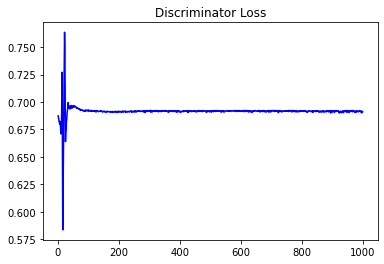

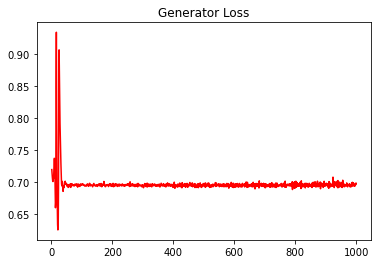

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1396355996898853


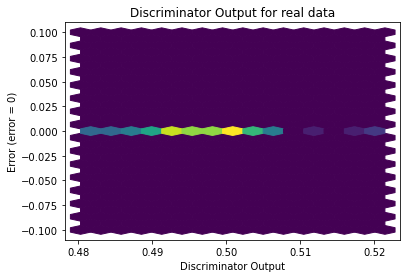

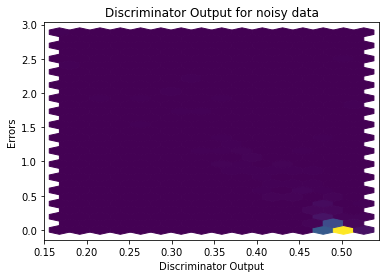

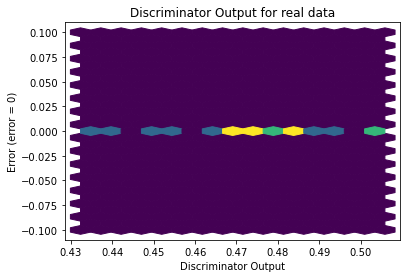

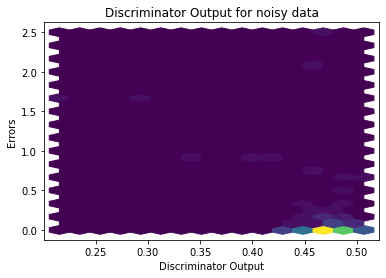

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


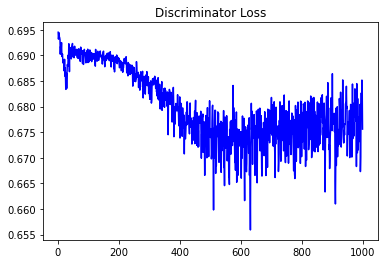

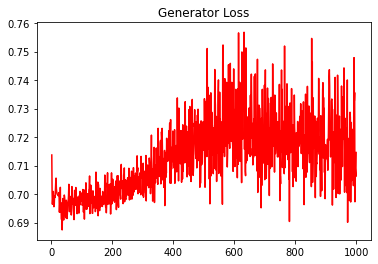

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10771392730478012


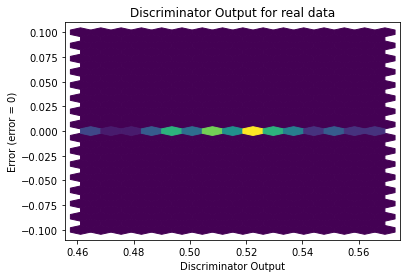

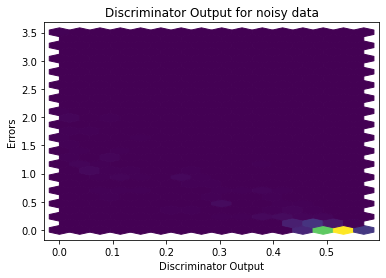

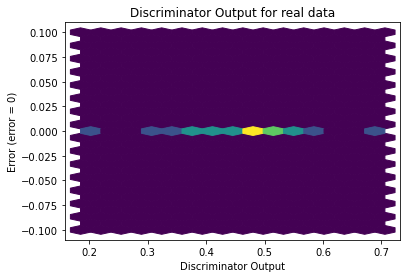

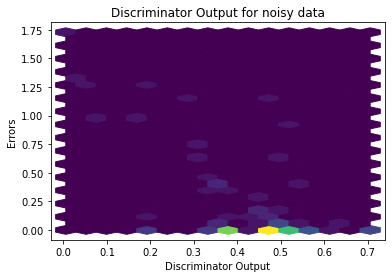

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5159]], requires_grad=True)
